# Crawling Reviews

In [2]:
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import re
import pandas as pd

### Coca Cola

In [3]:
driver = webdriver.Chrome(executable_path= r'C:/Users/Henri/DEV/NLP/chromedriver_win32/chromedriver.exe')
pages = 23
df = pd.DataFrame()
review_list = []
rating_list = []

for pg in range(1, pages):
    coke_url = 'https://www.mouthshut.com/product-reviews/Coca-Cola-reviews-925003734-page-'+str(pg)
    driver.get(coke_url)

    # close notification box
    if pg == 1:
        notification_box = driver.find_element_by_id('notifynotnow')
        notification_box.click()

    # click read more to see full review
    read_more = driver.find_elements_by_xpath("//a[.= 'Read More']")
    print(read_more)
    for i in read_more:
        driver.execute_script("arguments[0].click();", i)
    
    # Get the page source via BeautifulSoup
    req = driver.page_source
    soup = bs(req, 'html.parser')
    
    # Process and append reviews to dataframe
    reviews = soup.select('div.more.reviewdata')
    review_list.extend([re.sub(r'\.\.\.\w.*', '', review.text) for review in reviews])
    
    # Process and append ratings to dataframe
    ratings = soup.select('div.rating > span i')
    ratings = [rating['class'][1] for rating in ratings]
    ratings = list(map(lambda x: x=='rated-star', ratings))
    rating_list.extend([sum(ratings[i:i+5]) for i in range(0, len(ratings), 5)])

df['review'] = review_list
df['rating'] = rating_list
df_coke = df

[<selenium.webdriver.remote.webelement.WebElement (session="f4e14ba3d3707eb7a1c458fca4652c8c", element="e7f0aa5b-2def-4ba2-8891-dde7edb2ae66")>, <selenium.webdriver.remote.webelement.WebElement (session="f4e14ba3d3707eb7a1c458fca4652c8c", element="ee5bf366-7a69-4aef-a663-ebe352704bfb")>, <selenium.webdriver.remote.webelement.WebElement (session="f4e14ba3d3707eb7a1c458fca4652c8c", element="593d7893-cbf5-4ce2-a94d-d55a1c40942e")>, <selenium.webdriver.remote.webelement.WebElement (session="f4e14ba3d3707eb7a1c458fca4652c8c", element="0028f8b0-d2e1-4852-952a-05f626853719")>, <selenium.webdriver.remote.webelement.WebElement (session="f4e14ba3d3707eb7a1c458fca4652c8c", element="e8fb2a60-906b-4011-92e2-ee4e1f22ef13")>, <selenium.webdriver.remote.webelement.WebElement (session="f4e14ba3d3707eb7a1c458fca4652c8c", element="3d7d1524-5e40-4473-8f97-ee5d3774a3ed")>, <selenium.webdriver.remote.webelement.WebElement (session="f4e14ba3d3707eb7a1c458fca4652c8c", element="c3da3efc-a12c-484f-8124-d2ee286e

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=77.0.3865.90)


### Pepsi

In [119]:
driver = webdriver.Chrome(executable_path= r'C:/Users/Henri/DEV/NLP/chromedriver_win32/chromedriver.exe')
pages = 22
df = pd.DataFrame()
review_list = []
rating_list = []

for pg in range(1, pages):
    pepsi_url = 'https://www.mouthshut.com/product-reviews/Pepsi-reviews-925003732-page-'+str(pg)
    driver.get(pepsi_url)

    # close notification box
    if pg == 1:
        notification_box = driver.find_element_by_id('notifynotnow')
        notification_box.click()

    # click read more to see full review
    read_more = driver.find_elements_by_xpath("//a[.= 'Read More']")
    for i in read_more:
        driver.execute_script("arguments[0].click();", i)
    
    # Get the page source via BeautifulSoup
    req = driver.page_source
    soup = bs(req, 'html.parser')
    
    # Process and append reviews to dataframe
    reviews = soup.select('div.more.reviewdata')
    review_list.extend([re.sub(r'\.\.\.\w.*', '', review.text) for review in reviews])
    
    # Process and append ratings to dataframe
    ratings = soup.select('div.rating > span i')
    ratings = [rating['class'][1] for rating in ratings]
    ratings = list(map(lambda x: x=='rated-star', ratings))
    rating_list.extend([sum(ratings[i:i+5]) for i in range(0, len(ratings), 5)])

df['review'] = review_list
df['rating'] = rating_list
df_pepsi = df

In [143]:
df_coke.to_excel(r'df_coke.xlsx')

In [144]:
df_pepsi.to_excel(r'df_pepsi.xlsx')

# Preprocessing

In [257]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Henri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [291]:
df_coke = pd.read_excel('df_coke.xlsx', index_col=None)
df_pepsi = pd.read_excel('df_pepsi.xlsx', index_col=None)

In [510]:
df_pepsi

,review,rating
0,Pepsi is a trademark of coca cola company . It...,1
1,PEPSI cold drink is very old ans famous name ...,1
2,Although pepsi has made remarkable position ac...,1
3,"Hi everyone, everyone knows that drinking beve...",2
4,I loved to drink pepsi since my childhood .but...,1
5,"Hello friends, I would like to share my experi...",1
6,Pepsi is one of the popular drink no doubt. I ...,1
7,Hello friends today I am going to review on pe...,1
8,Guys I am one of the person among those who ar...,1
9,You all will be surprised to know that being a...,1


In [259]:
# # lowercase
# df_coke['review'] = df_coke['review'].str.lower()
# df_pepsi['review'] = df_pepsi['review'].str.lower()

# # tokenize
# tokenizer = RegexpTokenizer(r'\w+')
# df_coke['review'] = df_coke.apply(lambda row : tokenizer.tokenize(row['review']), axis=1)
# df_pepsi['review'] = df_pepsi.apply(lambda row : tokenizer.tokenize(row['review']), axis=1)

In [260]:
# # remove stopwords
# stopwords = stopwords.words('english')
# df_coke['review'] = df_coke['review'].apply(lambda x : [word for word in x if word not in stopwords])
# df_pepsi['review'] = df_pepsi['review'].apply(lambda x : [word for word in x if word not in stopwords])

In [293]:
df_coke.head()

,review,rating
0,I am also a children! I also have interest in ...,1
1,"Hi friends, today Im sharing about view on Coc...",1
2,"Dear Coco Cola, Kindly dont mingle or experime...",1
3,On my experience I prefer not to drink this at...,2
4,May be many of u knows it already. The bad eff...,1


In [294]:
df_pepsi.head()

,review,rating
0,Pepsi is a trademark of coca cola company . It...,1
1,PEPSI cold drink is very old ans famous name ...,1
2,Although pepsi has made remarkable position ac...,1
3,"Hi everyone, everyone knows that drinking beve...",2
4,I loved to drink pepsi since my childhood .but...,1


# Random Analysis

In [295]:
import pandas_profiling
import matplotlib.pyplot as plt

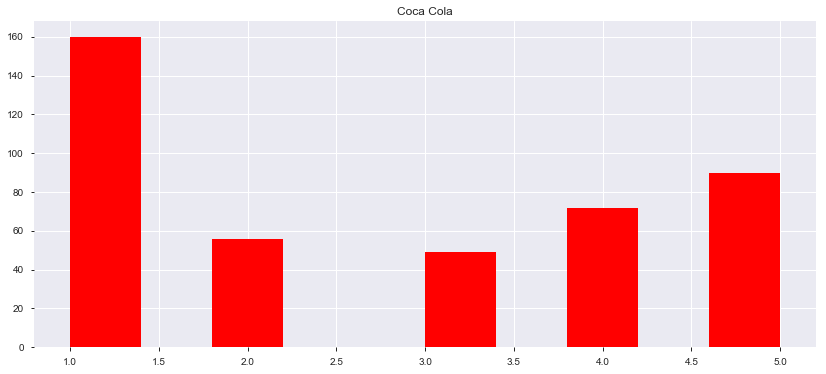

In [489]:
fig = plt.figure(figsize=(14,6))
plt.hist(df_coke['rating'], color='red')
plt.title('Coca Cola')
plt.savefig('ratings_coca_cola.png')
plt.show()

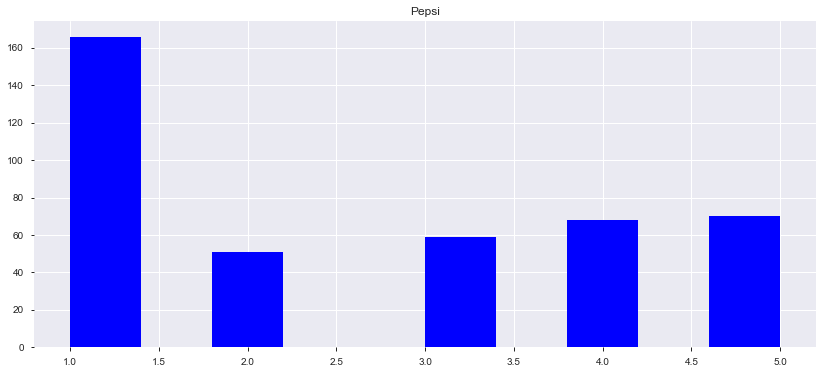

In [491]:
plt.figure(figsize=(14,6))
plt.hist(df_pepsi['rating'], color='b')
plt.title('Pepsi')
plt.savefig('ratings_pepsi.png')
plt.show()

# Term Frequency - Inverse Document Frequency(TF-IDF)

In [445]:
# group reviews by ratings from 1 to 5
coke_1 = df_coke[df_coke['rating'] == 1]
coke_2 = df_coke[df_coke['rating'] == 2]
coke_3 = df_coke[df_coke['rating'] == 3]
coke_4 = df_coke[df_coke['rating'] == 4]
coke_5 = df_coke[df_coke['rating'] == 5]

pepsi_1 = df_pepsi[df_pepsi['rating'] == 1]
pepsi_2 = df_pepsi[df_pepsi['rating'] == 2]
pepsi_3 = df_pepsi[df_pepsi['rating'] == 3]
pepsi_4 = df_pepsi[df_pepsi['rating'] == 4]
pepsi_5 = df_pepsi[df_pepsi['rating'] == 5]

In [446]:
# join the reviews of the same rating 
coke_1_join = ' '.join(coke_1['review'])
coke_2_join = ' '.join(coke_2['review'])
coke_3_join = ' '.join(coke_3['review'])
coke_4_join = ' '.join(coke_4['review'])
coke_5_join = ' '.join(coke_5['review'])

pepsi_1_join = ' '.join(pepsi_1['review'])
pepsi_2_join = ' '.join(pepsi_2['review'])
pepsi_3_join = ' '.join(pepsi_3['review'])
pepsi_4_join = ' '.join(pepsi_4['review'])
pepsi_5_join = ' '.join(pepsi_5['review'])

In [503]:
# Calculate TF-IDF value for coke
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [coke_1_join, coke_5_join]
tfidfv = TfidfVectorizer(stop_words='english').fit(corpus)

df_coke_final = pd.DataFrame(sorted(tfidfv.vocabulary_.items(), key= lambda x : x[1]), columns=['vocab',0])
del(df_coke_final[0])
df_coke_final['1-star TFIDF'] = tfidfv.transform(corpus).toarray()[0]
df_coke_final['5-star TFIDF'] = tfidfv.transform(corpus).toarray()[1]

# vocabs of top 20 TFIDF
df_coke_final[['vocab','5-star TFIDF']].sort_values(by=['5-star TFIDF'], ascending=False).head(20)
df_coke_final[['vocab','1-star TFIDF']].sort_values(by=['1-star TFIDF'], ascending=False).head(20)

,vocab,5-star TFIDF
949,cola,0.496496
927,coca,0.460917
943,coke,0.436658
1504,drink,0.334771
4541,taste,0.164960
2783,like,0.140701
2078,good,0.132615
3404,pepsi,0.118059
4227,soft,0.082480
2613,just,0.079245


In [508]:
# Calculate TF-IDF value for pepsi
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [pepsi_1_join, pepsi_5_join]
tfidfv = TfidfVectorizer(stop_words='english').fit(corpus)

df_pepsi_final = pd.DataFrame(sorted(tfidfv.vocabulary_.items(), key= lambda x : x[1]), columns=['vocab',0])
del(df_pepsi_final[0])
df_pepsi_final['1-star TFIDF'] = tfidfv.transform(corpus).toarray()[0]
df_pepsi_final['5-star TFIDF'] = tfidfv.transform(corpus).toarray()[1]

# vocabs of top 20 TFIDF
df_pepsi_final[['vocab','1-star TFIDF']].sort_values(by=['1-star TFIDF'], ascending=False).head(20)
df_pepsi_final[['vocab','5-star TFIDF']].sort_values(by=['5-star TFIDF'], ascending=False).head(20)

,vocab,5-star TFIDF
2869,pepsi,0.775823
1289,drink,0.346769
1686,fun,0.261584
2335,like,0.152814
3877,taste,0.121467
1758,good,0.119508
826,coke,0.119508
3605,soft,0.097957
3942,think,0.080325
442,best,0.078366
